## Import and Load

In [68]:
import pandas as pd
import numpy as np
import joblib

# Import shap and initialize javascript:
import shap
shap.initjs()

In [69]:
# Loading regression tree model
loaded = joblib.load('regression_tree_best-models.joblib')
loaded.keys()

dict_keys(['X_train', 'y_train', 'X_test', 'y_test', 'preprocessor', 'Regression_Tree'])

In [70]:
X_train_df = loaded['X_train']
y_train = loaded['y_train']
X_test_df= loaded['X_test']
y_test = loaded['y_test']
preprocessor = loaded['preprocessor']
loaded_model = loaded['Regression_Tree']

**Functions**

In [71]:
def get_importances(model, feature_names=None,name='Feature Importance',
                   sort=False, ascending=True):
    
    ## checking for feature names
    if feature_names == None:
        feature_names = model.feature_names_in_
        
    ## Saving the feature importances
    importances = pd.Series(model.feature_importances_, index= feature_names,
                           name=name)
    
    # sort importances
    if sort == True:
        importances = importances.sort_values(ascending=ascending)
        
    return importances

In [72]:
def plot_importance(importances, top_n=None,  figsize=(8,6)):
    # sorting with asc=false for correct order of bars
    if top_n==None:
        ## sort all features and set title
        plot_vals = importances.sort_values()
        title = "All Features - Ranked by Importance"
    else:
        ## sort features and keep top_n and set title
        plot_vals = importances.sort_values().tail(top_n)
        title = f"Top {top_n} Most Important Features"
    ## plotting top N importances
    ax = plot_vals.plot(kind='barh', figsize=figsize)
    ax.set(xlabel='Importance',
            ylabel='Feature Names',
            title=title)
    ## return ax in case want to continue to update/modify figure
    return ax

## Shap

In [73]:
# Checking length ... will use subset of data 
len(X_train_df2)

6392

In [74]:
X_shap = shap.sample(X_train_df,nsamples=400,random_state=321)
X_shap.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Size
4469,-1.201325,1.363802,0.159140,-1.023504,-1.286175,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.950224
4438,-1.815803,-0.733244,-0.606211,0.388559,0.741756,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-1.376216
366,-1.123632,1.363802,0.230603,1.884956,0.741756,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-1.376216
2219,-0.956475,-0.733244,-0.312724,-0.184640,0.145305,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.287004
6080,-1.467363,-0.733244,2.122053,-0.920256,0.026015,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.287004


In [75]:
## get the corresponding y-values
y_shap = y_train.loc[X_shap.index]
y_shap 

4469    1402.1748
4438    2120.5730
366     5153.2920
2219    2556.6720
6080      83.8908
          ...    
215      131.1626
4680    2251.0698
1288    1834.9448
3635     759.0120
7936    4074.6960
Name: Item_Outlet_Sales, Length: 400, dtype: float64

In [76]:
explainer = shap.Explainer(loaded_model)
explainer

In [77]:
## Getting the shap values
shap_values = explainer(X_shap,y_shap)
type(shap_values)

shap._explanation.Explanation

In [78]:
X_shap.shape

(400, 39)

In [79]:
shap_values.shape

(400, 39)

In [80]:
pd.DataFrame(shap_values.values, columns = X_shap.columns)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Size
0,0.372899,0.606776,-0.329031,-1217.792565,-57.807243,-0.016068,0.0,0.0,-0.146384,0.0,...,0.0,0.0,-0.403439,0.0,0.0,187.981441,0.0,0.0,-70.659974,0.0
1,1.606751,-0.358846,-0.859131,294.526494,-2.592618,-0.016068,0.0,0.0,-0.022354,0.0,...,0.0,0.0,-0.403439,0.0,0.0,280.641658,0.0,0.0,-145.317127,0.0
2,0.372899,0.606776,-0.667815,1588.002192,34.559996,-0.016068,0.0,0.0,-0.022354,0.0,...,0.0,0.0,-0.403439,0.0,0.0,357.045361,0.0,0.0,-209.994320,0.0
3,0.372899,-0.358846,-0.466612,-224.657931,-2.592618,-0.016068,0.0,0.0,-0.022354,0.0,...,0.0,0.0,0.486967,0.0,0.0,246.294051,0.0,0.0,-134.784792,0.0
4,1.857855,-1.723418,-1.808251,-395.054244,-1.699672,-0.079463,0.0,0.0,-0.110551,0.0,...,0.0,0.0,-16.972094,0.0,0.0,-1477.407233,0.0,0.0,-63.028178,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,1.857855,2.914143,-1.808251,-140.726829,-1.699672,-0.079463,0.0,0.0,-0.110551,0.0,...,0.0,0.0,-3.298829,0.0,0.0,-1672.673160,0.0,0.0,-64.401086,0.0
396,-0.151048,0.606776,-0.391854,-714.184974,-2.592618,0.184782,0.0,0.0,-0.022354,0.0,...,0.0,0.0,-1.316730,0.0,0.0,217.883374,0.0,0.0,-130.267591,0.0
397,-0.151048,-0.358846,-0.391854,-224.192482,-2.592618,-0.016068,0.0,0.0,-0.022354,0.0,...,0.0,0.0,-0.501951,0.0,0.0,247.266710,0.0,0.0,-134.784792,0.0
398,-0.752549,-1.723418,-7.391809,852.300425,45.585188,-0.079463,0.0,0.0,-0.110551,0.0,...,0.0,0.0,1.888095,0.0,0.0,-2390.599854,0.0,0.0,-87.353329,0.0


## Summary Plots

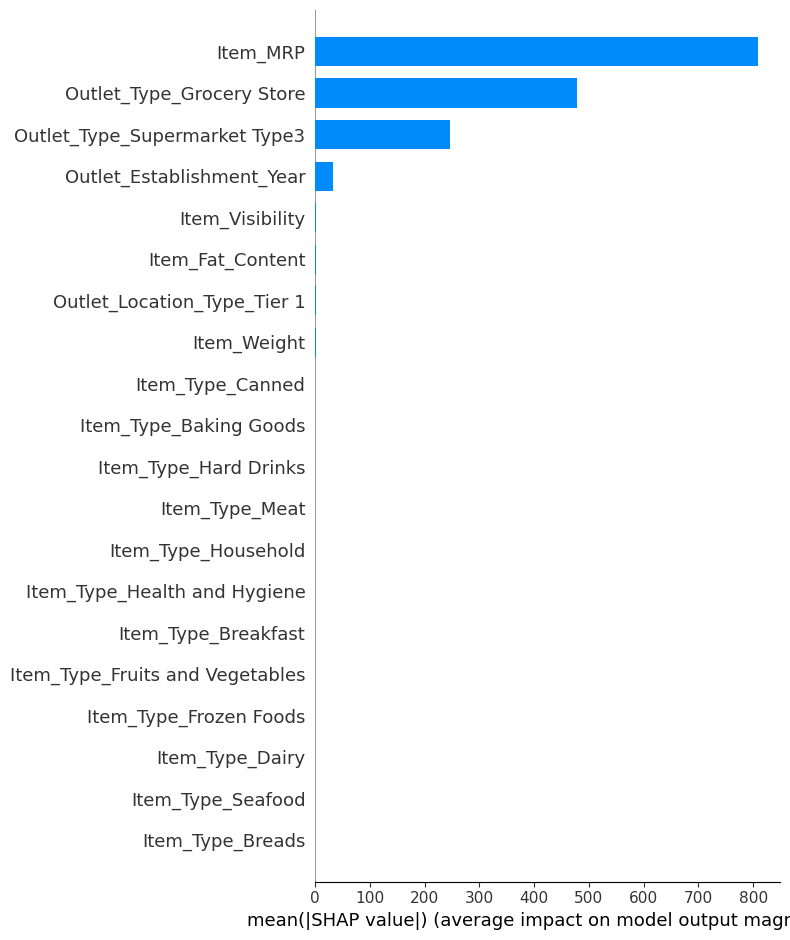

In [81]:
shap.summary_plot(shap_values,features= X_shap, plot_type='bar')

In [82]:
importances = get_importances(loaded_model,sort=True,ascending=False)
importances

Item_MRP                           0.550246
Outlet_Type_Grocery Store          0.327792
Outlet_Type_Supermarket Type3      0.113796
Outlet_Establishment_Year          0.007912
Item_Visibility                    0.000165
Item_Fat_Content                   0.000049
Outlet_Location_Type_Tier 1        0.000021
Item_Weight                        0.000015
Item_Type_Canned                   0.000003
Item_Type_Baking Goods             0.000001
Outlet_Identifier_OUT046           0.000000
Outlet_Identifier_OUT019           0.000000
Outlet_Identifier_OUT027           0.000000
Outlet_Identifier_OUT035           0.000000
Outlet_Identifier_OUT045           0.000000
Outlet_Location_Type_Tier 3        0.000000
Outlet_Identifier_OUT049           0.000000
Outlet_Location_Type_Tier 2        0.000000
Outlet_Identifier_OUT017           0.000000
Outlet_Type_Supermarket Type1      0.000000
Outlet_Type_Supermarket Type2      0.000000
Outlet_Identifier_OUT018           0.000000
Item_Type_Soft Drinks           

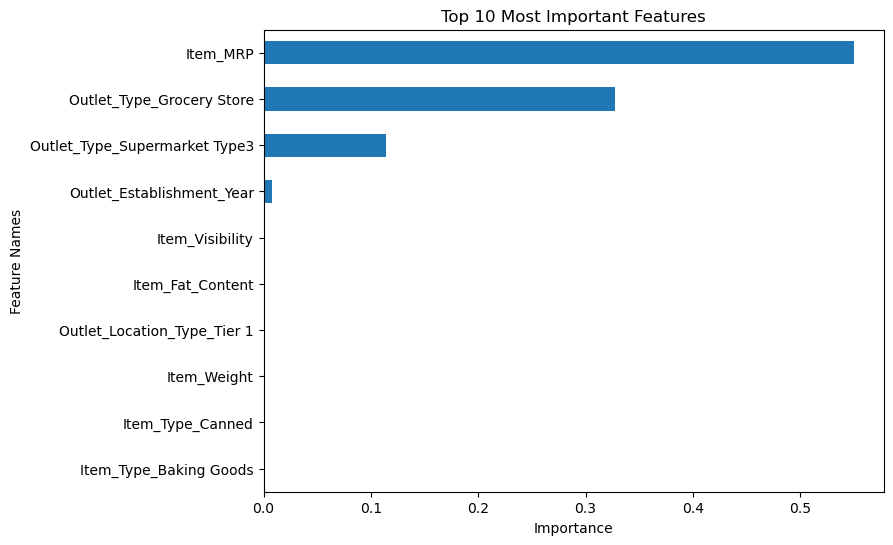

In [83]:
plot_importance(importances,top_n=10);

**Comparison**

* The top SHAP features are the same as the top features in original model/feature importances. 

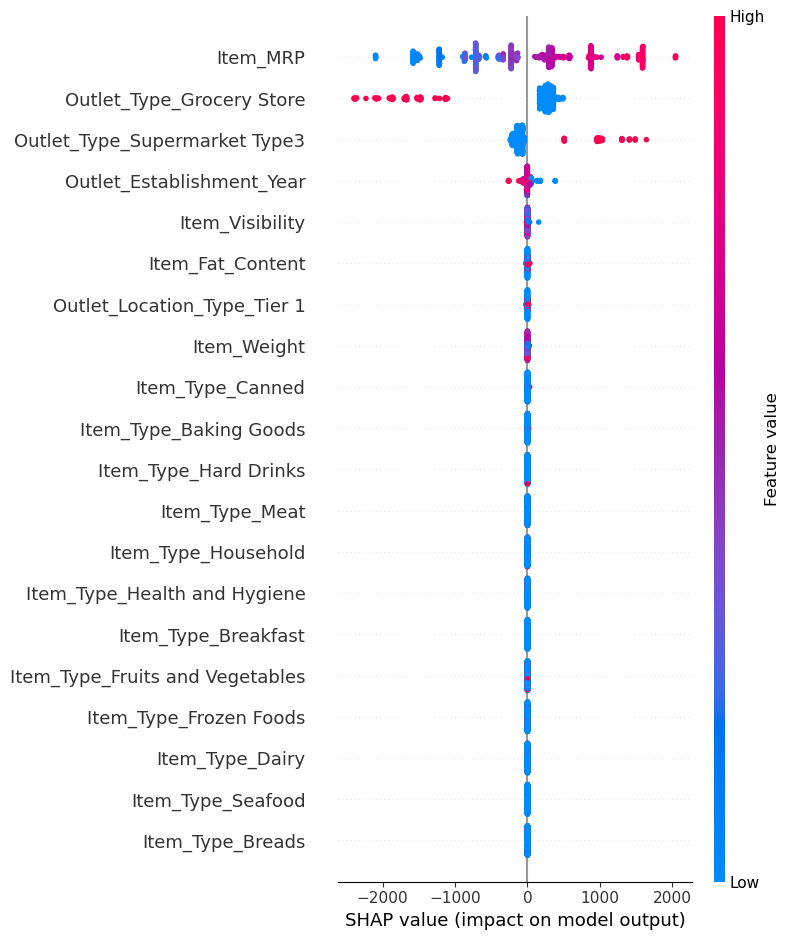

In [87]:
shap.summary_plot(shap_values,X_shap)

**Interpretation:**

* ??

## Local Explanations